<a href="https://colab.research.google.com/github/NguyenVanDucAnh-20104015/AI-Bai-Tap/blob/main/Corn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/New Plant Diseases Dataset(Augmented)

/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    './Train',
    
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    shuffle = True
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

valid_datasets = tf.keras.preprocessing.image_dataset_from_directory(
    './Val',
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)
class_names = valid_datasets.class_names
valid_data = valid_datasets.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 3200 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.


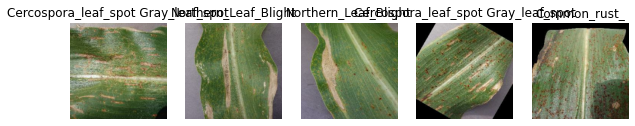

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_data.take(1):
    for i in range(0,5):
        plt.subplot(2,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_data, epochs=100, batch_size=128)

Epoch 1/100
100/100 [==============================] - 296s 3s/step - loss: 24.0563 - accuracy: 0.7678
Epoch 2/100
100/100 [==============================] - 292s 3s/step - loss: 0.2054 - accuracy: 0.9222
Epoch 3/100
100/100 [==============================] - 295s 3s/step - loss: 0.1560 - accuracy: 0.9372
Epoch 4/100
100/100 [==============================] - 293s 3s/step - loss: 0.1406 - accuracy: 0.9475
Epoch 5/100
100/100 [==============================] - 293s 3s/step - loss: 0.1139 - accuracy: 0.9550
Epoch 6/100
100/100 [==============================] - 291s 3s/step - loss: 0.1204 - accuracy: 0.9484
Epoch 7/100
100/100 [==============================] - 290s 3s/step - loss: 0.1464 - accuracy: 0.9416
Epoch 8/100
100/100 [==============================] - 290s 3s/step - loss: 0.1032 - accuracy: 0.9588
Epoch 9/100
100/100 [==============================] - 289s 3s/step - loss: 0.0757 - accuracy: 0.9731
Epoch 10/100
100/100 [==============================] - 289s 3s/step - loss: 0.10

In [ ]:
model.save('bap.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_corn=load_model('bap.h5')

In [ ]:
model.evaluate(train_data)
model.evaluate(valid_datasets)

38/38 [==============================] - 33s 819ms/step - loss: 0.4734 - accuracy: 0.9342


[0.4733957350254059, 0.934166669845581]

1/1 [==============================] - 0s 48ms/step
Northern_Leaf_Blight


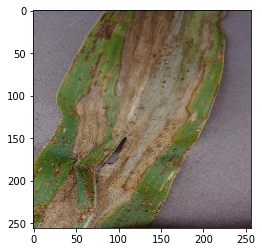

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (224,224)) 
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)
    pred = pred[0]
    expression = ['Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'healthy']
    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('/content/005318c8-a5fa-4420-843b-23bdda7322c2___RS_NLB 3853 copy.jpg')

1/1 [==============================] - 0s 54ms/step
Cercospora_leaf_spot Gray_leaf_spot


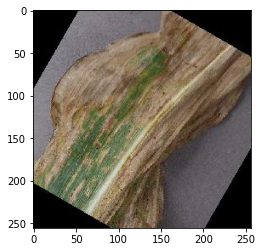

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (224,224)) 
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)
    pred = pred[0]
    expression = ['Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'healthy']
    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('/content/5cbbb4b8-88cc-4d5f-907a-505a2a831b8a___RS_GLSp 4599_new30degFlipLR.JPG')

1/1 [==============================] - 0s 51ms/step
Common_rust_


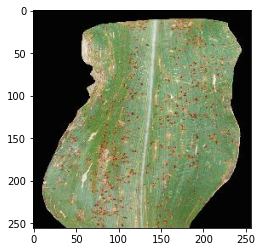

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (224,224)) 
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)
    pred = pred[0]
    expression = ['Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'healthy']
    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('/content/RS_Rust 1997.JPG')

1/1 [==============================] - 0s 50ms/step
healthy


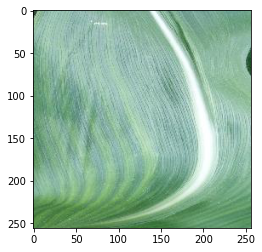

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (224,224)) 
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)
    pred = pred[0]
    expression = ['Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'healthy']
    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('/content/healthy.jpg')